In [72]:
from fastai.tabular import *
from fastai import *
from fastai.core import Path

In [73]:
Path

pathlib.Path

In [74]:
! pwd

/home/ec2-user/SageMaker/predict_ratings_from_review_comments/train


In [75]:
ROOT_PATH = Path('/home/ec2-user/SageMaker/predict_ratings_from_review_comments')
DATA_PATH = ROOT_PATH/'data'
SAVED_MODEL_PATH = ROOT_PATH/'saved_models'

In [76]:
reviews_csv_path = DATA_PATH/'reviews_with_category.csv'

In [77]:
df = pd.read_csv(reviews_csv_path); df

,Unnamed: 0,product_id,product,brand,id,cosmetics_review_id,user_nickname,rating,review_text,review_title,...,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary
0,0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,0ba8b592-4a23-497e-a552-7a00d2aab624,09e96669-6277-48b1-9e81-a41adec3bea1,NaN,5,"Until now, this was only available at very hig...",My Favorite Perfume!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,8d998af2-04ad-4ac9-8304-c29b798f6e80,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving
2,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,9332d1b1-abc0-43ee-b8f7-0aaf4fabf1df,sz123,1,This starts out smelling like a delieghtfully ...,I'll pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,09e96669-6277-48b1-9e81-a41adec3bea1,dolceragazza,5,I have received lots of compliments when I wea...,love it!!!!,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN
4,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
5,5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,a72059c5-0aad-4f87-a489-38f7f02a30ea,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MaggieV18,5,I got a sample for my fiance and he loved it s...,NaN,...,NaN,NaN,NaN,yes,NaN,18to24,NaN,NaN,Men,NaN
6,6,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,9f301430-067b-428b-9fe0-360a86318dca,1bcabd81-b7ce-453c-bd39-5267272fc3ee,dafauk,4,I use this and I'm a girl (if that matters at ...,Smells like.... dog shampoo?,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Men,NaN
7,7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,31bb84fb-1415-46c5-9b07-9559678f398f,1bcabd81-b7ce-453c-bd39-5267272fc3ee,beautyman,4,"I like this cleanser. It smells good, kind of ...","Cleansing, smells great",...,NaN,NaN,NaN,yes,NaN,25to34,NaN,NaN,Men,NaN
8,8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,ec333234-1b85-41d3-a2b9-d049cedcf99f,1bcabd81-b7ce-453c-bd39-5267272fc3ee,rickycn,5,i was looking for a good facial cleanser and i...,GREAT!,...,NaN,NaN,NaN,no,NaN,25to34,NaN,NaN,Men,NaN
9,9,51f1e81a-d5b2-40ba-9a93-c2aad0cf493b,The 4 Elements of the Perfect Shave&#x2122; Ca...,The Art of Shaving,5fa4250b-2323-495d-90cd-b36e8322b4d0,a3bd8b6d-bae0-46b2-b12e-a7876aa8d629,kdo78,5,Purchased for a friend who has very sensitive ...,Awesome Product!,...,NaN,NaN,NaN,yes,NaN,25to34,NaN,NaN,Men,NaN


### Remove unwanted columns and keep review text and id for deduplication

In [78]:
relevant_df = df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating', 
    'id',     
    'review_text',      
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                  
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
relevant_df.head()

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


### Deduplicate with product_id, user_nickname and review_text

In [79]:
dedup_revelant_df = relevant_df.drop_duplicates(
    subset=['product_id', 'user_nickname', 'review_text'], 
    keep='first', 
    inplace=False)

dedup_revelant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
5,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MaggieV18,5,a72059c5-0aad-4f87-a489-38f7f02a30ea,I got a sample for my fiance and he loved it s...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,18to24,NaN,Men,NaN
6,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,dafauk,4,9f301430-067b-428b-9fe0-360a86318dca,I use this and I'm a girl (if that matters at ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Men,NaN
7,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,beautyman,4,31bb84fb-1415-46c5-9b07-9559678f398f,"I like this cleanser. It smells good, kind of ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN
8,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,rickycn,5,ec333234-1b85-41d3-a2b9-d049cedcf99f,i was looking for a good facial cleanser and i...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,25to34,NaN,Men,NaN
9,51f1e81a-d5b2-40ba-9a93-c2aad0cf493b,The 4 Elements of the Perfect Shave&#x2122; Ca...,The Art of Shaving,kdo78,5,5fa4250b-2323-495d-90cd-b36e8322b4d0,Purchased for a friend who has very sensitive ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,25to34,NaN,Men,NaN


### Remove review text, brand and product_id and make product_id into a single column with name

In [80]:
analysis_df = dedup_revelant_df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'beautyInsider',    
    'skinTone',
    'hairConcerns',                                     
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
analysis_df.head()
analysis_df['product_id_name'] = df['product_id'] + " " + df['product'].astype(str) + " " + df['brand'].astype(str)
analysis_df.head()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,product_id,product,brand,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,hairConcerns,age,eyeColor,product_category_primary,product_category_secondary,product_id_name
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,35to44,NaN,Men,Shaving,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...


### Reorganise column sequence

In [81]:
analysis_df = analysis_df[['product_id_name',        
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                           
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
analysis_df.head()

,product_id_name,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...,charlie201,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,dolceragazza,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,MouseRat,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


In [82]:
analysis_df.shape


(141849, 17)

## Train

In [83]:
dep_var = 'rating'
cat_names = ['product_id_name',     
    'user_nickname',       
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',         
    'beautyInsider',
    'skinTone',
    'eyeColor',
    'age',          
    'product_category_primary',
    'product_category_secondary']
cont_names = []
procs = [FillMissing, Categorify, Normalize]

### Create test batch

In [84]:
doc(TabularList.from_df)

In [85]:
test = TabularList.from_df(analysis_df.iloc[500:1000].copy(), path=DATA_PATH, cat_names=cat_names, cont_names=cont_names)

### Create data Batch with batch size 512

In [86]:
data = (TabularList.from_df(analysis_df, cat_names=cat_names, procs=procs)
                   .split_by_idx(list(range(127664, 141848)))
                   .label_from_df(cols=dep_var)
                   .add_test(test)
                   .databunch(bs=512))

In [87]:
learner = tabular_learner(data, layers=[200, 100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 2.51E-02


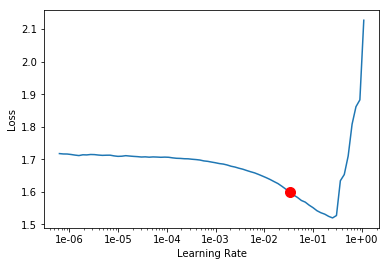

In [88]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [89]:
learner.fit_one_cycle(1, max_lr= 5e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.111268,1.183422,0.611746,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 8.32E-03


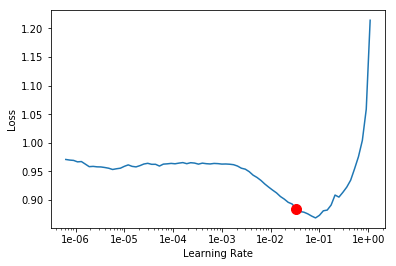

In [90]:
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [91]:
learner.save(SAVED_MODEL_PATH/'stage-1')

In [92]:
learner.fit_one_cycle(1, max_lr=8e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.473416,1.268064,0.607022,00:13


### Try a prediction


In [94]:
learner.load(SAVED_MODEL_PATH/'stage-1')

Learner(data=TabularDataBunch;

Train: LabelList (127665 items)
x: TabularList
product_id_name f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciaga Paris BALENCIAGA; user_nickname #na#; StaffContext #na#; VerifiedPurchaser #na#; skinConcerns #na#; skinType #na#; IncentivizedReview #na#; hairCondition #na#; hairColor #na#; hairConcerns #na#; beautyInsider #na#; skinTone #na#; eyeColor #na#; age #na#; product_category_primary Fragrance; product_category_secondary #na#; ,product_id_name 94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave Oil - Unscented The Art of Shaving; user_nickname charlie201; StaffContext #na#; VerifiedPurchaser #na#; skinConcerns #na#; skinType #na#; IncentivizedReview #na#; hairCondition #na#; hairColor #na#; hairConcerns #na#; beautyInsider yes; skinTone #na#; eyeColor #na#; age 35to44; product_category_primary Men; product_category_secondary Shaving; ,product_id_name 3858badd-8a32-4775-996b-8f08197dffaf Orange Sanguine Cologne Absolue Pure Perfume Atelier Cologne; user_ni

In [116]:
rows = analysis_df.iloc[2000:12000]
# x = learner.predict(r)[0]
# x.__str__()

# r['rating'].__str__()

rows

170000

In [118]:
correct = 0


for _index, row in rows.iterrows():
    prediction = learner.predict(row)
    predicted_class = prediction[0]
    if actual.__str__() == row["rating"].__str__():
        correct += 1
        
print(correct)
    
    

6389
